# MLOps

**Assignment 1: Data Versioning using clear.ml**

+ **Carlson, Nic**
+ **Guardi, Tom**
+ **Leonard, Andrew**
+ **Tyomkin, Lev**

**Due date: Thursday, Apr 22, 2021: 6pm**

**Objective:** Leverage clear.ml versioning platform using popular ML dataset

**Refer to:**
 - https://allegro.ai/clearml/docs/docs/getting_started/getting_started_clearml_hosted_service.html
 - https://www.youtube.com/watch?v=lD84X0_0TBE
 
**Steps:**
 - Step 1: Select popular ML dataset, import and make dataset dirty
 - Step 2: Initialize clear.ml project, version data, and then clean data and re-version
 - Step 3: Clean, model, and version
 - Step 4: Transform, model, and version
 - Step 5: Compare model and dataset versions in UI

**Additional resources on clear.ml:**
 - Clearml GitHub:
    - https://github.com/allegroai/clearml
    - https://clearml.ml
 
 - Getting started:
    - https://allegro.ai/clearml/docs/rst/getting_started/index.html
    - Simple sklearn training example: [here](https://github.com/allegroai/clearml/blob/master/examples/frameworks/scikit-learn/sklearn_joblib_example.py)

 - [Ui walk through](https://allegro.ai/clearml/docs/rst/webapp/index.html)

 - [Simple code example (uploading data, and using it)](https://github.com/allegroai/events/tree/master/odsc20-east/generic)

#  Step 1: Import and make dataset dirty

Import libraries

In [73]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

b) Read in the data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [74]:
# enter your drive here
path = "2019.csv"

In [75]:
df = pd.read_csv(path, index_col = 0)

In [7]:
df.isna().sum()

Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [8]:
df.head(3)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 1 to 156
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.0+ KB


Make data dirty

In [76]:
dfDirty = df.copy()
dfDirty.iloc[0,2:] = dfDirty.iloc[0,2:]*-1
dfDirty.head(3)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,-1.340,-1.587,-0.986,-0.596,-0.153,-0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


Save dirty dataset to local data folder

In [77]:
dataset_folder = "data/"

In [78]:
dfDirty.to_csv(dataset_folder + "happiness_data.csv")

# Step 2: Initialize clear.ml project with dirty data, model, and version

Start using clear.ml with the dirty dataset and version the dataset.

If notebook is idle too long you might need to uncomment and install

In [ ]:
# !pip install clearml

     |████████████████████████████████| 890kB 5.8MB/s 
     |████████████████████████████████| 92kB 3.9MB/s 


# Input credentials from Nic's workspace

In [ ]:
# # Configuration
# api {
#     # Nic Carlson's workspace
#     web_server: https://app.community.clear.ml
#     api_server: https://api.community.clear.ml
#     files_server: https://files.community.clear.ml
#     credentials {
#         "access_key" = "########"
#         "secret_key" = "########"
#     }
# }

In [13]:
!clearml-init

ClearML SDK setup process
Configuration file already exists: C:\Users\carlson nic\clearml.conf
Leaving setup, feel free to edit the configuration file.


In [79]:
# Establish first task
from clearml import Task
task = Task.init(project_name="assignment1", task_name="dirty_data_preProcessEDA")

ClearML Task: created new task id=321177277e4f46ab91b5d60de7540ad9
ClearML results page: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/321177277e4f46ab91b5d60de7540ad9/output/log


Upload dirty dataset to ClearML (i.e. create version 1)

In [80]:
# Upload data to ClearML
!clearml-data create --project assignment1 --name 'dirty_dataset'

# Sync local data folder with ClearML
!clearml-data sync --folder data/happiness_data.csv

2021-04-17 18:09:10,668 - clearml.Task - INFO - No repository found, storing script code instead
ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring
clearml-data - Dataset Management & Versioning CLI
Creating a new dataset:
New dataset created id=cf15b353fd5140bc9f83e7b70d5332cb
clearml-data - Dataset Management & Versioning CLI
Syncing dataset id cf15b353fd5140bc9f83e7b70d5332cb to local folder data/happiness_data.csv
Sync completed: 0 files removed, 1 added / modified
Finalizing dataset
Pending uploads, starting dataset upload to https://files.community.clear.ml
Uploading compressed dataset changes (1 files, total 4.63 KB) to https://files.community.clear.ml
Upload completed (4.63 KB)
2021-04-17 18:09:43,887 - clearml.Task - INFO - Waiting to finish uploads
2021-04-17 18:09:44,107 - clearml.Task - INFO - Finished uploading
Dataset closed and finalized


Run EDA (exploratory data analysis) of the dirty dataset - submit the plots.

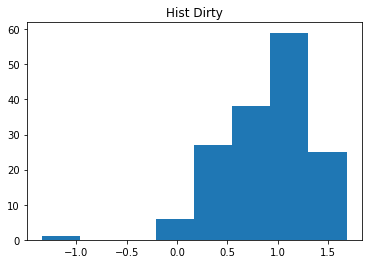

In [81]:
# GDP is a strong predictor
plt.hist(dfDirty['GDP per capita'], bins=8)
plt.title("Hist Dirty")
plt.show()

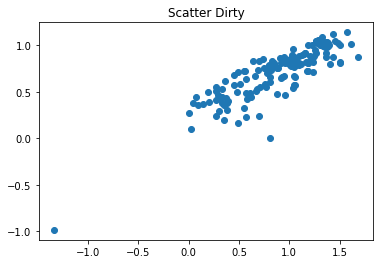

In [82]:
plt.scatter(dfDirty['GDP per capita'],dfDirty['Healthy life expectancy'])
plt.title("Scatter Dirty")
plt.show()

In [83]:
task.close()

2021-04-17 18:09:45,602 - clearml.Task - INFO - Waiting to finish uploads
2021-04-17 18:09:59,088 - clearml.Task - INFO - Finished uploading


### Dirty Model
Use the dirty dataset to build a baseline machine learning model.

Train Test Split

__Target Variable: Healthy Life Expectancy__

In [84]:
# Establish task
task = Task.init(project_name="assignment1", task_name="training dirty")

ClearML Task: created new task id=703e16249122496a84ddfa5c42d31d00
ClearML results page: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/703e16249122496a84ddfa5c42d31d00/output/log


In [85]:
# predictors
X = dfDirty[['GDP per capita',
             'Social support',
             'Freedom to make life choices', 
             'Generosity', 
             'Perceptions of corruption']]
# target
y = dfDirty['Healthy life expectancy']

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=426)

# upload processed data
# print('Uploading process dataset')
# task.upload_artifact('X_train', X_train)
# task.upload_artifact('X_test', X_test)
# task.upload_artifact('y_train', y_train)
# task.upload_artifact('y_test', y_test)

Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf_dirty = RandomForestRegressor(max_depth=2, random_state=0)
rf_dirty.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [87]:
import joblib
joblib.dump(rf_dirty, 'rf_dirty.pkl', compress=True)

loaded_model = joblib.load('rf_dirty.pkl')
result = loaded_model.score(X_test, y_test)

print('model trained & stored')

2021-04-17 18:10:04,014 - clearml.Task - INFO - No repository found, storing script code instead
ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring
model trained & stored


In [88]:
y_pred = rf_dirty.predict(X_test)

Results


In [89]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07702010004921575
Mean Squared Error: 0.011539677070834004
Root Mean Squared Error: 0.10742288895218748


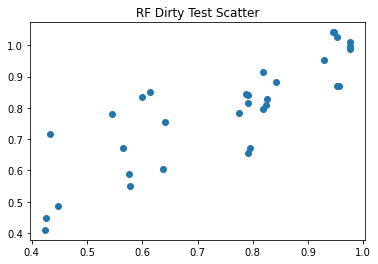

In [90]:
# Results on Test
plt.scatter(y_pred, y_test)
plt.title("RF Dirty Test Scatter")
plt.show()

Training results look overfit and you can see our Finland outlier clearly

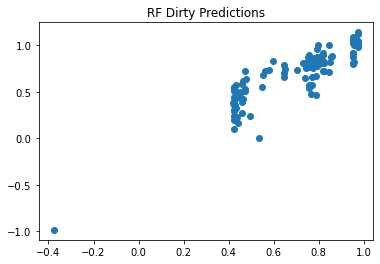

In [91]:
# Results on Train
plt.scatter(rf_dirty.predict(X_train), y_train)
plt.title("RF Dirty Predictions")
plt.show()

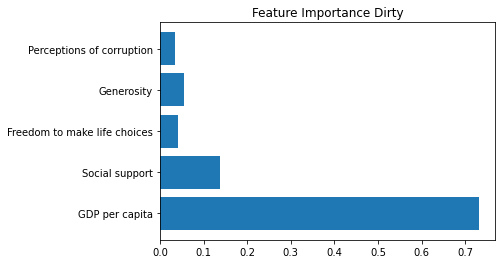

In [92]:
plt.barh(width = rf_dirty.feature_importances_, y=X.columns)
plt.title("Feature Importance Dirty")
plt.show()

In [93]:
task.close()

2021-04-17 18:10:11,331 - clearml.Task - INFO - Waiting to finish uploads
2021-04-17 18:10:22,367 - clearml.Task - INFO - Finished uploading


# Step 3: Clean, model, and version

In [94]:
task = Task.init(project_name="assignment1", task_name="clean_data_preProcessEDA")

ClearML Task: created new task id=c96383281b9040bf9b002f374da6c51e
ClearML results page: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/c96383281b9040bf9b002f374da6c51e/output/log


In [95]:
# Reverse dirtying steps above
dfClean = dfDirty.copy()
dfClean.iloc[0,2:] = dfClean.iloc[0,2:]*-1

In [96]:
dfClean.to_csv(dataset_folder+"/happiness_data.csv")

Update the dataset version to go from dirty to clean dataset.

In [97]:
# Do clear.ml magic e.g. version
from clearml import Dataset
dataset = Dataset.get(dataset_id = 'a7dbe610552441c1af83a3716994216e')

new_dataset = Dataset.create(dataset_project = 'assignment1', dataset_name = 'clean_dataset', parent_datasets=[dataset])
new_dataset.sync_folder(local_path=dataset_folder)
new_dataset.upload()
new_dataset.finalize()

2021-04-17 18:10:26,289 - clearml.Task - INFO - No repository found, storing script code instead
ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring
Generating SHA2 hash for 2 files
Hash generation completed
Uploading compressed dataset changes (1 files, total 358 bytes) to https://files.community.clear.ml
Upload completed (358 bytes)
2021-04-17 18:10:37,704 - clearml.Task - INFO - Waiting to finish uploads
2021-04-17 18:10:37,898 - clearml.Task - INFO - Finished uploading


True

Run EDA (exploratory data analysis) of the clean dataset - submit the plots.

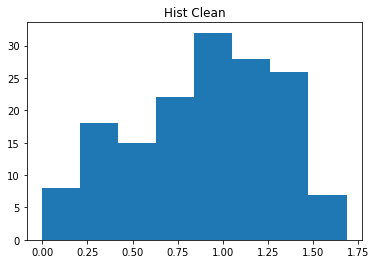

In [98]:
# GDP is a strong predictor
plt.hist(df['GDP per capita'], bins=8)
plt.title("Hist Clean")
plt.show()

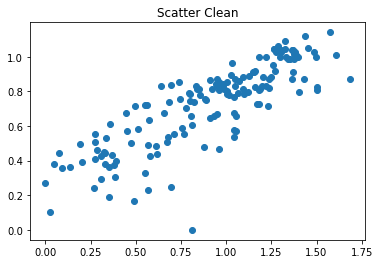

In [99]:
plt.scatter(df['GDP per capita'],df['Healthy life expectancy'])
plt.title("Scatter Clean")
plt.show()

In [100]:
task.close()

2021-04-17 18:10:38,752 - clearml.Task - INFO - Waiting to finish uploads
2021-04-17 18:10:40,977 - clearml.Task - INFO - Finished uploading


Build a machine learning model with this "new" clean dataset

In [101]:
# Establish task
task = Task.init(project_name="assignment1", task_name="training clean")

ClearML Task: created new task id=afbf86e003904852a9a09c78d87e2cc4
ClearML results page: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/afbf86e003904852a9a09c78d87e2cc4/output/log


In [102]:
# predictors
X = dfClean[['GDP per capita',
             'Social support',
             'Freedom to make life choices', 
             'Generosity', 
             'Perceptions of corruption']]
# target
y = dfClean['Healthy life expectancy']

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=426)

Random Forest Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor
rf_clean = RandomForestRegressor(max_depth=2, random_state=0)
rf_clean.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [104]:
import joblib
joblib.dump(rf_clean, 'rf_clean.pkl', compress=True)

loaded_model = joblib.load('rf_clean.pkl')
result = loaded_model.score(X_test, y_test)

print('model trained & stored')

2021-04-17 18:10:46,563 - clearml.Task - INFO - No repository found, storing script code instead
ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring
model trained & stored


In [105]:
y_pred = rf_clean.predict(X_test)

Results


In [106]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07253981653567454
Mean Squared Error: 0.010195385417798429
Root Mean Squared Error: 0.10097220121299935


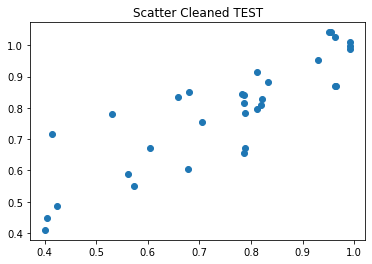

In [107]:
# Results on Test
plt.scatter(y_pred, y_test)
plt.title("Scatter Cleaned TEST")
plt.show()

Training results look overfit and clustered

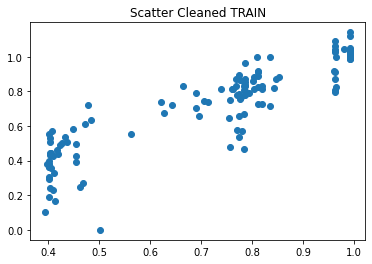

In [108]:
# Results on Train
plt.scatter(rf_clean.predict(X_train), y_train)
plt.title("Scatter Cleaned TRAIN")
plt.show()

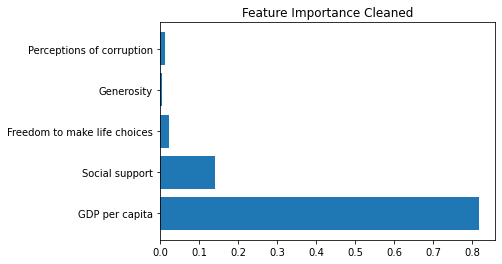

In [109]:
plt.barh(width = rf_clean.feature_importances_, y=X.columns)
plt.title("Feature Importance Cleaned")
plt.show()

In [110]:
y_pred = rf_clean.predict(X_train)

In [111]:
# Evaluating the Algorithm - on Train
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 0.08626760794632085
Mean Squared Error: 0.013644154248769632
Root Mean Squared Error: 0.1168081942706488


In [112]:
task.close()

2021-04-17 18:10:51,806 - clearml.Task - INFO - Waiting to finish uploads
2021-04-17 18:11:04,982 - clearml.Task - INFO - Finished uploading


# Step 4: Transform, model, and version

Transform the clean dataset using aggregation - call this the transformed dataset.

In [113]:
task = Task.init(project_name="assignment1", task_name="transformed_data_preProcessEDA")

ClearML Task: created new task id=c5d2e0926aeb40408bf3b6891e73abd5
ClearML results page: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/c5d2e0926aeb40408bf3b6891e73abd5/output/log


In [114]:
df['Social Generosity'] = df['Social support'] * df['Generosity']
df['Score'] = np.log(df['Score'])

In [115]:
df.to_csv(dataset_folder+'/happiness_data.csv')

Update the dataset version with the transformed dataset

In [116]:
# Do clear.ml magic e.g. version
new_dataset = Dataset.create(dataset_project = 'assignment1', dataset_name = 'transformed_dataset', parent_datasets=[dataset])
new_dataset.sync_folder(local_path=dataset_folder)
new_dataset.upload()
new_dataset.finalize()

2021-04-17 18:11:08,037 - clearml.Task - INFO - No repository found, storing script code instead
ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring
Generating SHA2 hash for 2 files
Hash generation completed
Uploading compressed dataset changes (2 files, total 6.87 KB) to https://files.community.clear.ml
Upload completed (6.87 KB)
2021-04-17 18:11:21,386 - clearml.Task - INFO - Waiting to finish uploads
2021-04-17 18:11:21,622 - clearml.Task - INFO - Finished uploading


True

Run EDA (exploratory data analysis) of the transformed dataset - submit the plots.

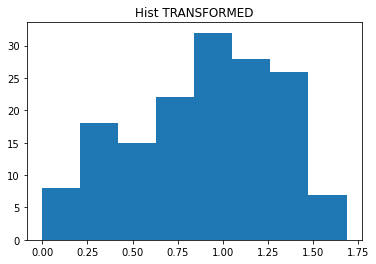

In [117]:
# GDP is a strong predictor
plt.hist(df['GDP per capita'], bins=8)
plt.title("Hist TRANSFORMED")
plt.show()

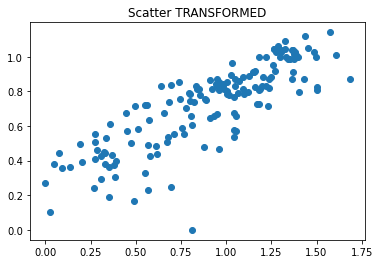

In [118]:
plt.scatter(df['GDP per capita'],df['Healthy life expectancy'])
plt.title("Scatter TRANSFORMED")
plt.show()

In [119]:
task.close()

2021-04-17 18:11:22,517 - clearml.Task - INFO - Waiting to finish uploads
2021-04-17 18:11:28,090 - clearml.Task - INFO - Finished uploading


Build a machine learning model with the transformed dataset.

In [120]:
# Establish task
task = Task.init(project_name="assignment1", task_name="training transformed")

ClearML Task: created new task id=118ef3701f25408dae0dd12d7f0e04a0
ClearML results page: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/118ef3701f25408dae0dd12d7f0e04a0/output/log


In [121]:
# predictors
X = df[['GDP per capita',
             'Social support',
             'Freedom to make life choices', 
             'Generosity', 
             'Perceptions of corruption',
             'Social Generosity']]
# target
y = df['Healthy life expectancy']

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=426)

Random Forest Regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor
rf_trans = RandomForestRegressor(max_depth=2, random_state=0)
rf_trans.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [123]:
joblib.dump(rf_trans, 'rf_trans.pkl', compress=True)

loaded_model = joblib.load('rf_trans.pkl')
result = loaded_model.score(X_test, y_test)

print('model trained & stored')

2021-04-17 18:11:31,504 - clearml.Task - INFO - No repository found, storing script code instead
ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring
model trained & stored


In [125]:
y_pred = rf_trans.predict(X_test)

Results


In [126]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07328917782726302
Mean Squared Error: 0.010390462790936347
Root Mean Squared Error: 0.10193361953220512


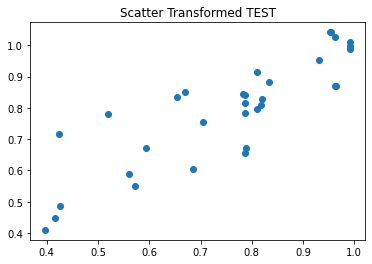

In [127]:
# Results on Test
plt.scatter(y_pred, y_test)
plt.title("Scatter Transformed TEST")
plt.show()

Training results look overfit and clustered

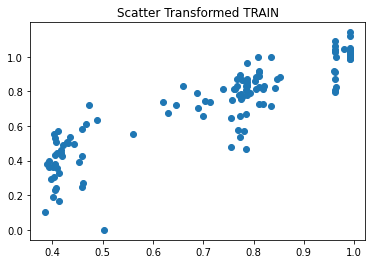

In [128]:
# Results on Train
plt.scatter(rf_trans.predict(X_train), y_train)
plt.title("Scatter Transformed TRAIN")
plt.show()

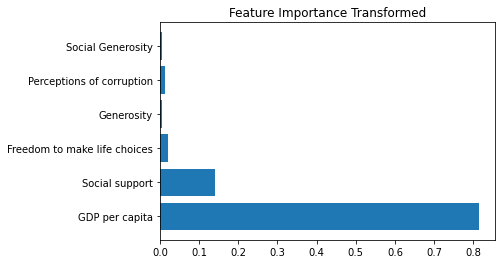

In [129]:
plt.barh(width = rf_trans.feature_importances_, y=X.columns)
plt.title("Feature Importance Transformed")
plt.show()

In [130]:
task.close()

2021-04-17 18:12:50,192 - clearml.Task - INFO - Waiting to finish uploads
2021-04-17 18:12:50,591 - clearml.Task - INFO - Finished uploading


# Step 5: Compare model and dataset versions in UI

Compare and comment the accuracy of the models using the dirty, clean and transformed datasets.

Transformed:
- Mean Absolute Error: 0.07328917782726302
- Mean Squared Error: 0.010390462790936347
- Root Mean Squared Error: 0.10193361953220512


Clean:
- Mean Absolute Error: 0.07253981653567454
- Mean Squared Error: 0.010195385417798429
- Root Mean Squared Error: 0.10097220121299935

Dirty:
- Mean Absolute Error: 0.07702010004921575
- Mean Squared Error: 0.011539677070834004
- Root Mean Squared Error: 0.10742288895218748

Based on our results, we can observe a clear performance improvement of our Cleaned dataset over our Dirty dataset. This is evident by lower Mean Absolute Error metrics from 0.077 to 0.072, lower Mean Squared Error metrics from 0.012 to 0.01, and consequently lower RMSE from 0.107 to 0.101. Having lower scores of MSE means our Clean Trained predictions are closer to actual values and the same came be inferred for lower MAE as a negatrively-oriented accuracy metric. 

Our Transformed Dataset predictions actually saw decreased accuracy as MAE, MSE, and RMSE all went slightly higher compared to Clean (while remaining an improvement over our Dirty data). This suggests that feature engineered transformations like 'Score' and 'Social Generosity' did not improve the accuracy of our model predictions. Further testing should be administered to identify more optimal transformations.

Submit the models and the comparison:

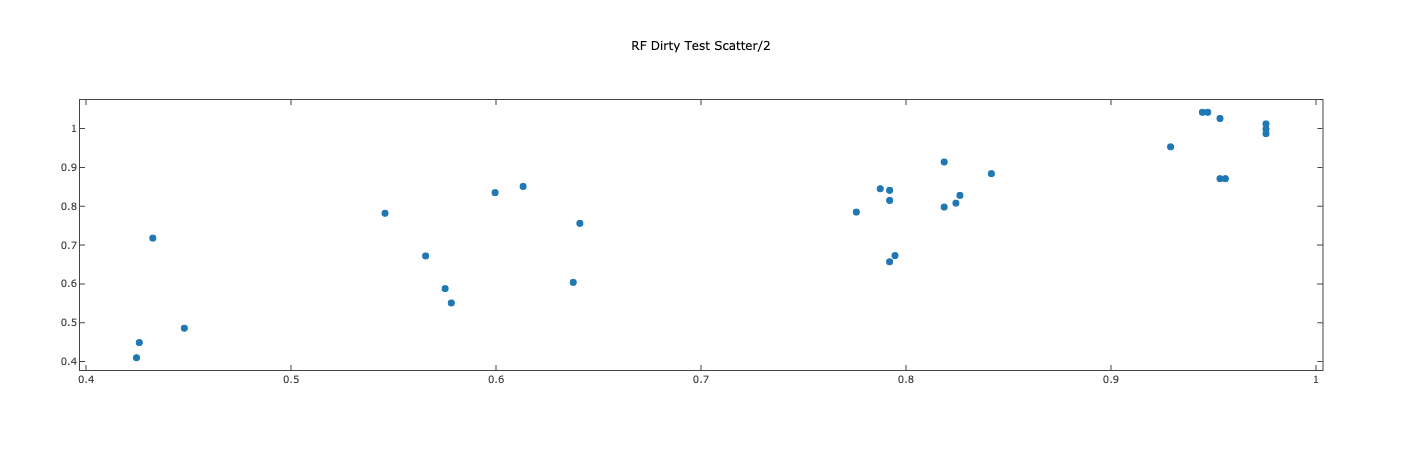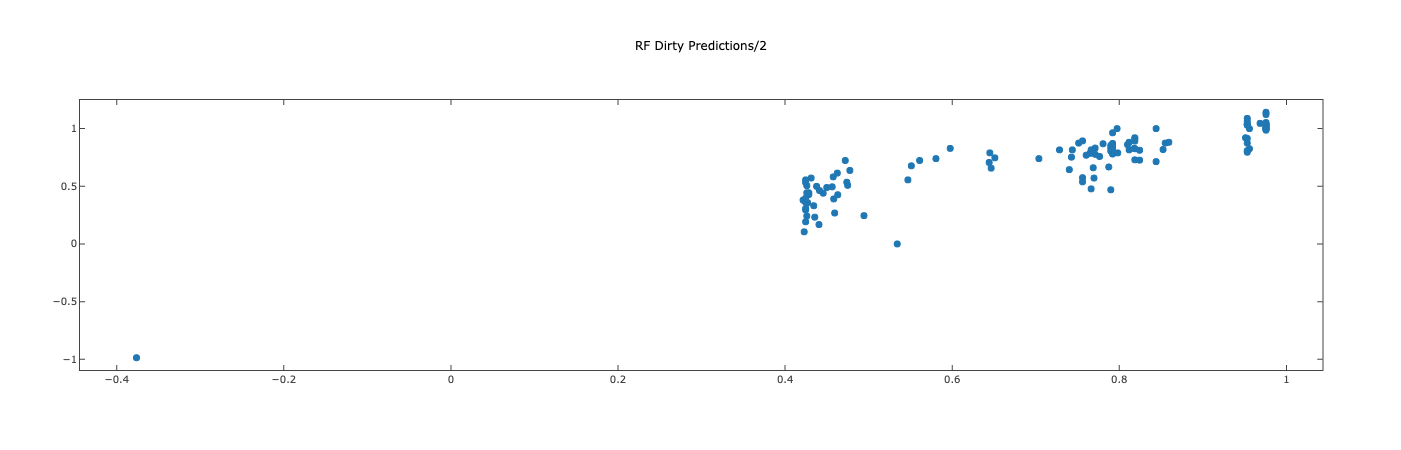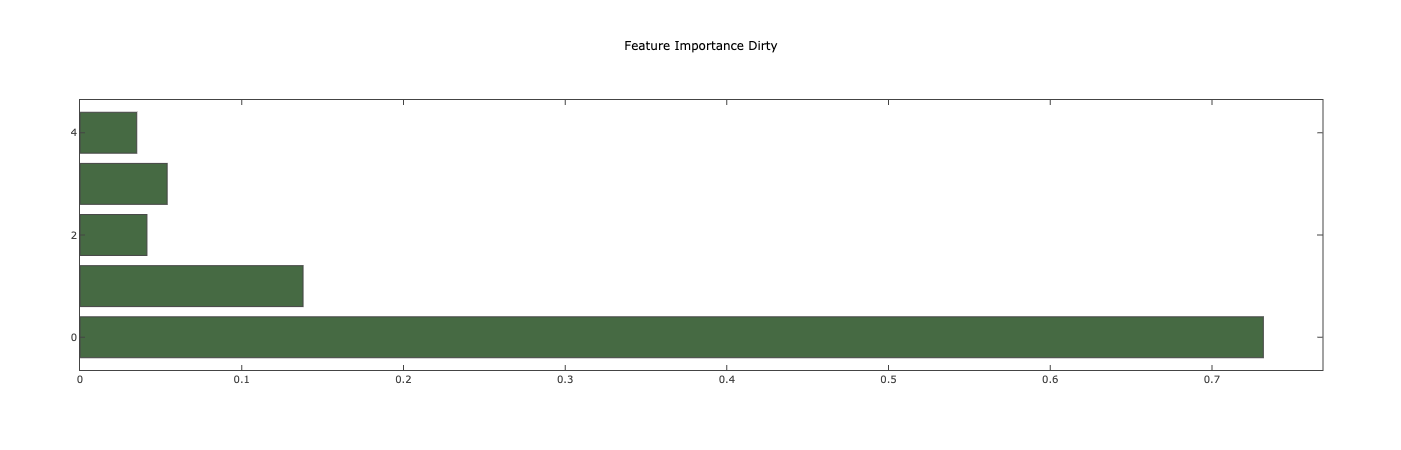

Based on the EDA of our Dirty dataset, our manually generated outlier set comprised of negative values is evident in the Predictions scatterplot.

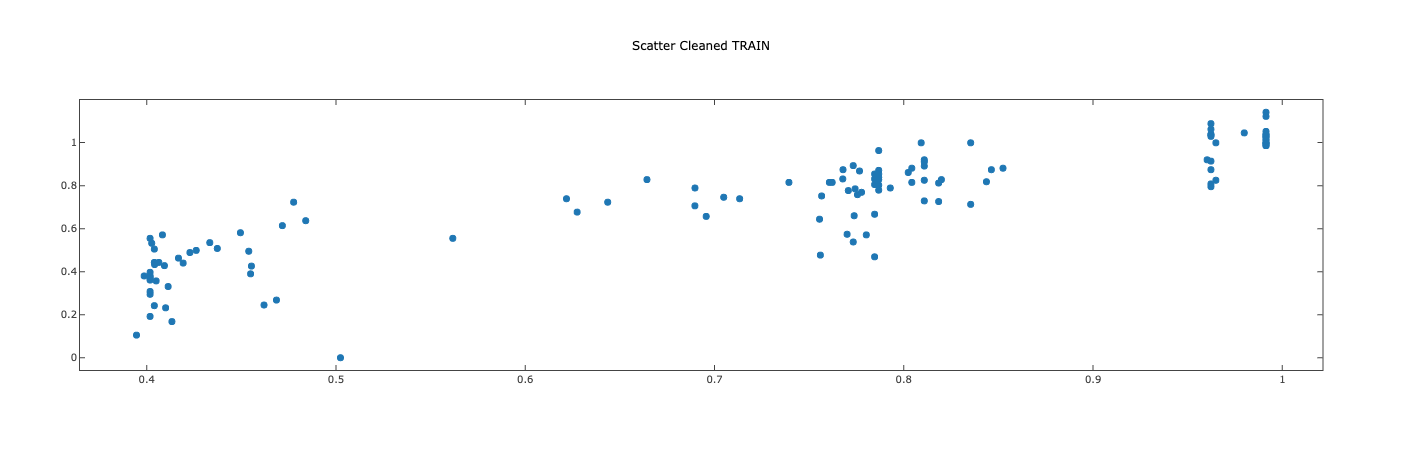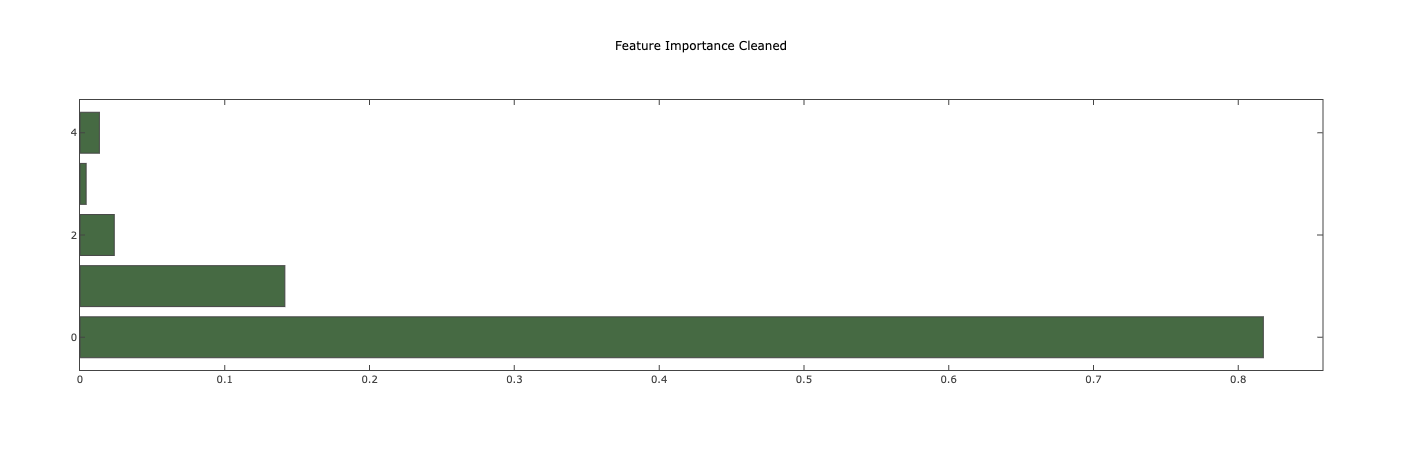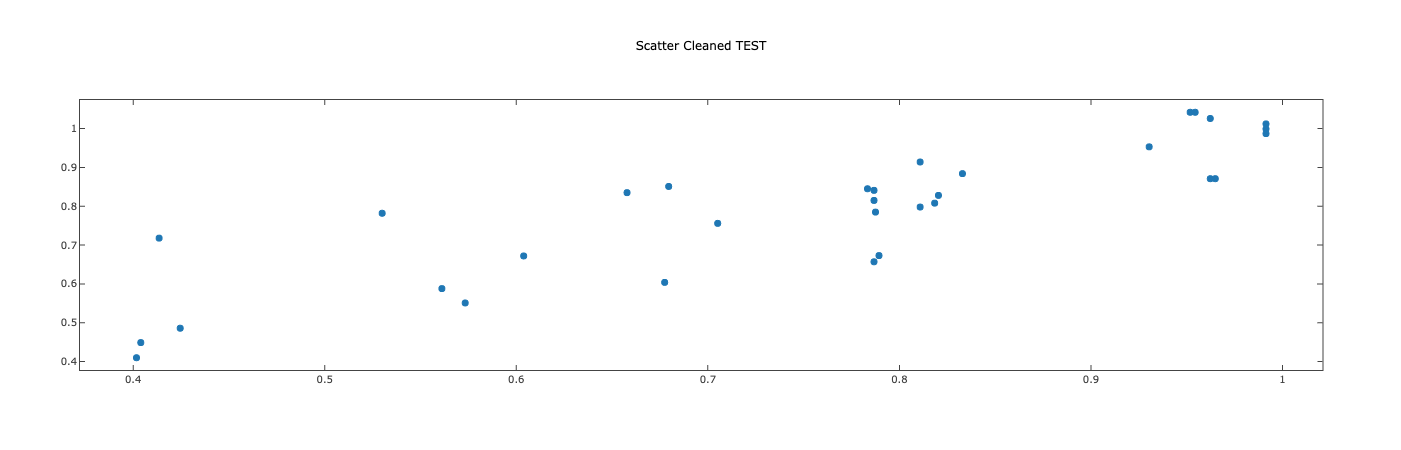

The difference between the cleaned and dirty data is eveident in the scatterplots, removing the outliers previously entered for the dirty set. Visible overfitting of our Training data is illustrated by the clustering effect in the Training scatter. This effect drove our decision to plot  GDP in our EDA - in an effort to see if that clustering was reflected in our feature importance histograms and how it related to the clustering of countries by GDP.

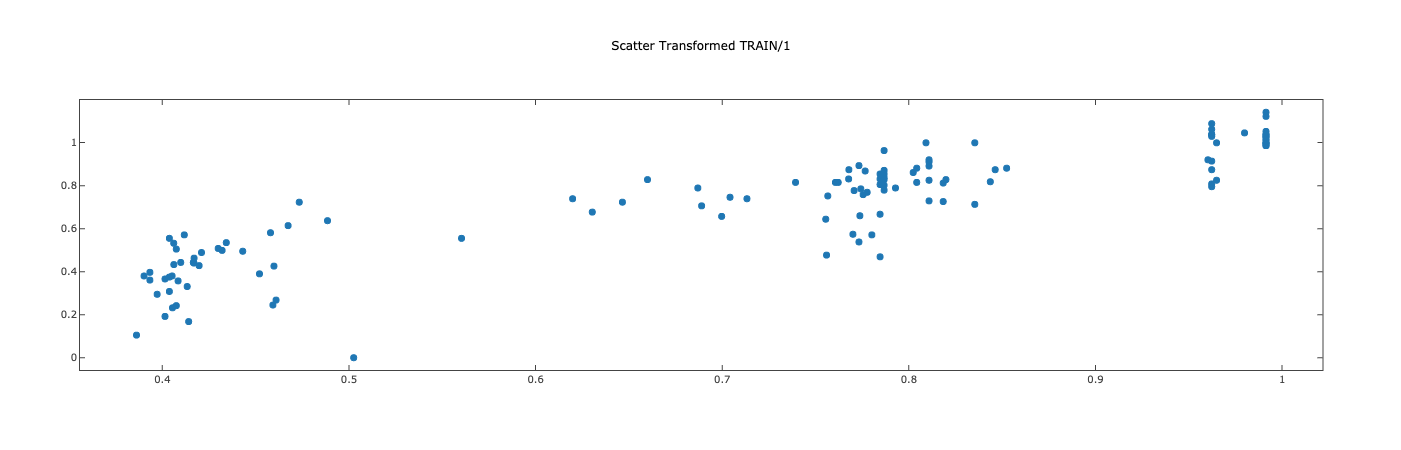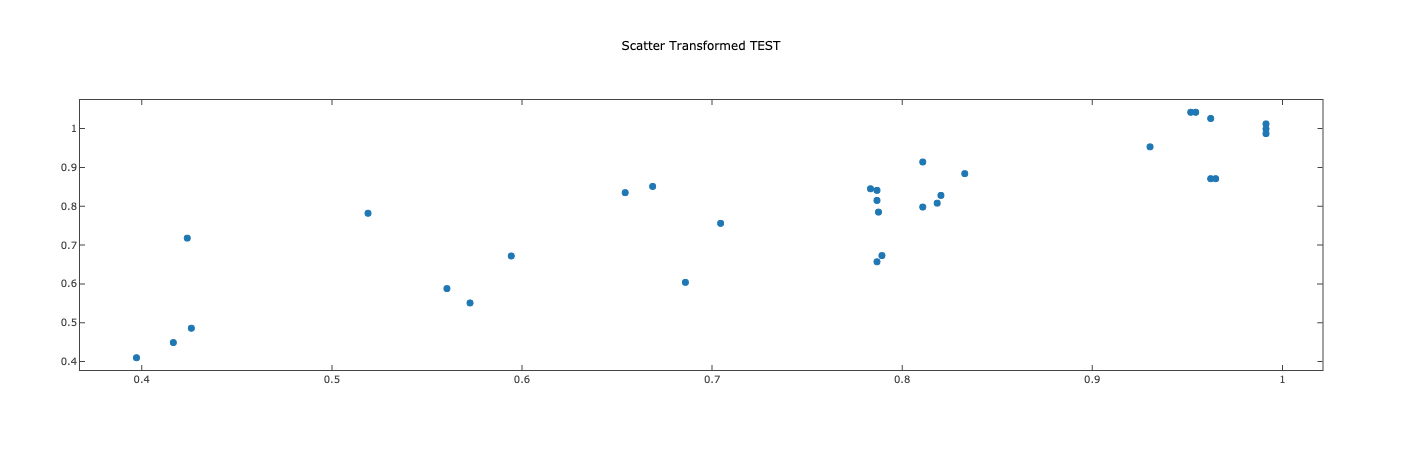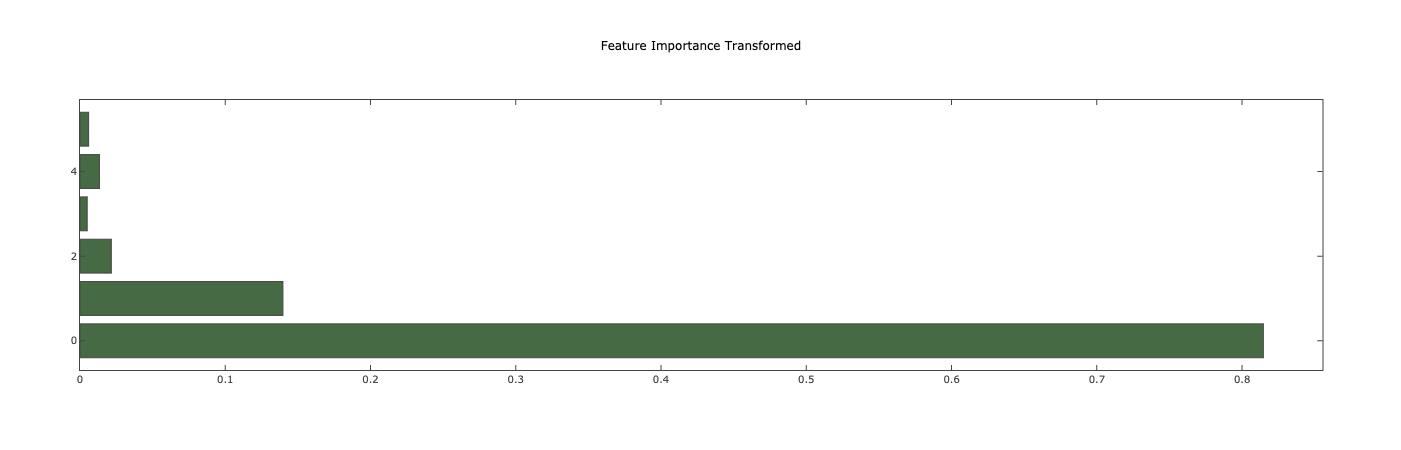

The transformed version of our Clean data largely resembles the scatterplot of our clean set in trend/spread; however, the noticable difference here is the inclusion of new features evident in our Feature Importance plot. Our engineered feature "social generosity" did not change the overall feature importance breakdown and GDP remained dominant.

The full breakdown of our Models/Comparison can be refenced in our ClearML Project Folder comprised of the following Experiment List: 

training transformed: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/118ef3701f25408dae0dd12d7f0e04a0/output/execution
transformed_data_preProcessEDA: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/c5d2e0926aeb40408bf3b6891e73abd5/output/execution
transformed_dataset: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/b4d7c1e7d24840708ba1583effff33a8/output/execution
training clean: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/afbf86e003904852a9a09c78d87e2cc4/output/execution
clean_data_preProcessEDA: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/c96383281b9040bf9b002f374da6c51e/output/execution
clean_dataset: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/f346e109ca884ca58a8f4ae0b8c914a1/output/execution
training dirty: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/703e16249122496a84ddfa5c42d31d00/output/execution
dirty_data_preProcessEDA: https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/321177277e4f46ab91b5d60de7540ad9/output/execution
'dirty_dataset': https://app.community.clear.ml/projects/ef0b38af172e49578627be10b55c08bc/experiments/cf15b353fd5140bc9f83e7b70d5332cb/output/execution